In [37]:
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.decomposition import PCA, KernelPCA

In [13]:
def load_emb_data(file_name):
    # load dict of arrays
    dict_data = np.load(f"../../data/processed/{file_name}.npz")
    # extract the first array
    return dict_data['arr_0']

feature_bert_vec = load_emb_data("feature_reduce_vec")
feature_index = load_emb_data("feature_reduce_index")
feature_label = load_emb_data("feature_reduce_label")

title_bert_vec = load_emb_data("title_reduce_vec")
title_index = load_emb_data("title_reduce_index")
title_label = load_emb_data("title_reduce_label")

Text(0.5, 1.0, 'Feature labels distribution')

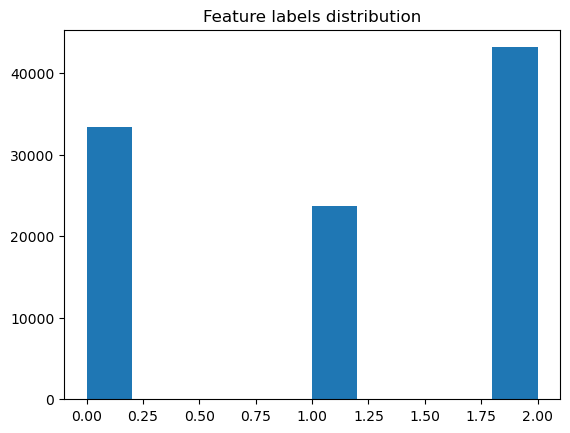

In [20]:
plt.hist(feature_label)
plt.title("Feature labels distribution")

Text(0.5, 1.0, 'Title labels distribution')

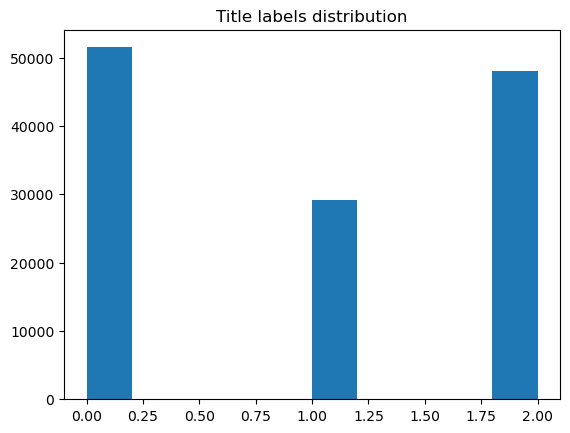

In [21]:
plt.hist(title_label)
plt.title("Title labels distribution")

# PCA

In [39]:
pca = PCA(n_components=2)
kernel_pca = KernelPCA(n_components=2, kernel="rbf")

# Linear PCA
feature_2D = pca.fit_transform(feature_bert_vec)
title_2D = pca.fit_transform(title_bert_vec)

# Kernel PCA
feature_k_2D = kernel_pca.fit_transform(feature_bert_vec)
title_k_2D = kernel_pca.fit_transform(title_bert_vec)

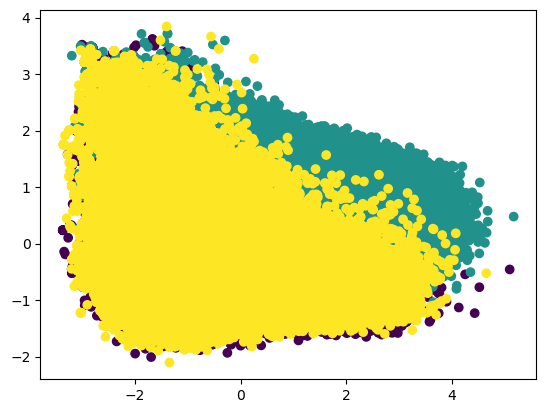

In [34]:
plt.scatter(feature_2D[:, 0], feature_2D[:, 1], c=feature_label)

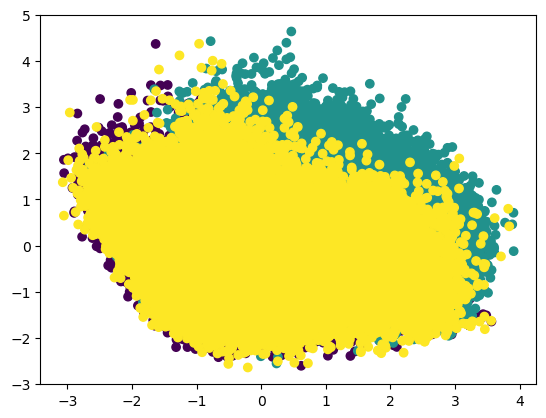

In [35]:
plt.scatter(title_2D[:, 0], title_2D[:, 1], c=title_label)